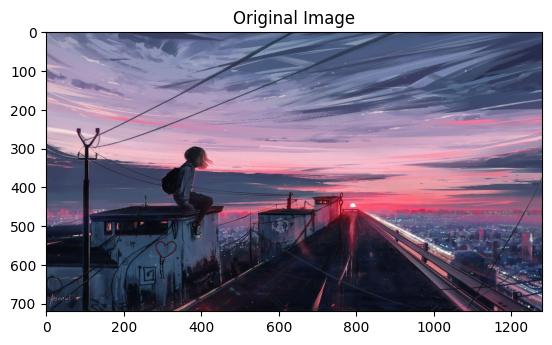

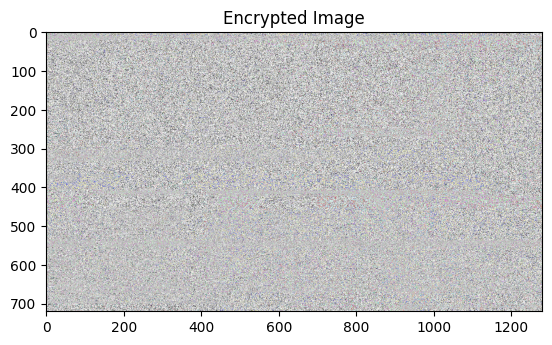

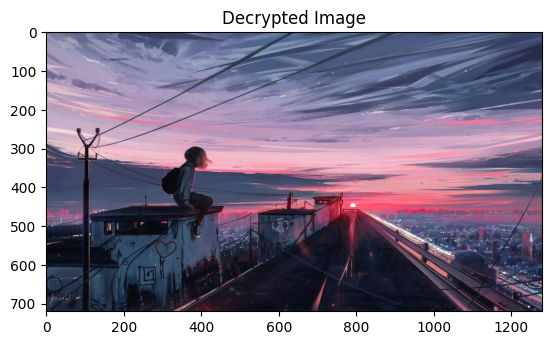

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def LorenzKey(x0, y0, z0 , num_steps):
  dt = 0.01
  xs = np.empty(num_steps + 1)
  ys = np.empty(num_steps + 1)
  zs = np.empty(num_steps + 1)

  xs[0], ys[0], zs[0] = (x0,y0,z0)

  s = 10
  r = 28
  b = 2.667
  for i in range(num_steps):
    xs[i + 1] = xs[i] + (s * (ys[i] - xs[i]) * dt)
    ys[i + 1] = ys[i] + ((xs[i] * (r - zs[i]) -ys[i]) * dt)
    zs[i + 1] = zs[i] + ((xs[i] * ys[i] - b * zs[i]) * dt)

  return xs,ys,zs

plt.title('Original Image')
img = mpimg.imread("trial.bmp")
plt.imshow(img)
plt.show()

height = img.shape[0]
width = img.shape[1]

xkey, ykey, zkey = LorenzKey(0.01,0.02,0.05 , height * width)

l = 0
x=[]
y=[]
xindex=[]
yindex=[]
encrypted_image = np.zeros(shape = [height, width , 4], dtype = np.uint8)
l = 0

#Generating indices for shuffling rows and columns
for i in range(width):
  xindex.append(i)
for i in range(height):
  yindex.append(i)


#Shuffling the index
for i in range(height):
  for j in range(width):
    if (xkey[i] > xkey[j]):
      #rearaanging the key in ascending order
      xkey[i], xkey[j] = xkey[j],xkey[i]

      #reordering the index and
      #rearaanging the key
      xindex[i],xindex[j] = xindex[j],xindex[i]

for i in range(height):
  for j in range(width):
    if (ykey[i] > ykey[j]):
      #rearaanging the key in ascending order
      ykey[i], ykey[j] = ykey[j],ykey[i]

      #reordering the index and
      #rearaanging the key
      yindex[i],yindex[j] = yindex[j],yindex[i]



# Convert the image to RGBA
img_rgba = np.concatenate((img, np.full((img.shape[0], img.shape[1], 1), 255, dtype=np.uint8)), axis=-1)

# Then use img_rgba in your code
#ROW SHUFFLING
for i in range(height):
  encrypted_image[i] = img_rgba[yindex[i]]



l = 0
for i in range(height):
  for j in range(width):
    zk =int((zkey[l]*pow(10,12))%256)
    #now the pixel value is XORed with the key
    encrypted_image[i,j] = encrypted_image[i,j] ^ zk
    l+=1
plt.title('Encrypted Image')
plt.imshow(encrypted_image)
plt.show()



# Initialize the decrypted image
decrypted_image = np.zeros(shape=[height, width, 4], dtype=np.uint8)

# Reverse XOR operation
l = 0
for i in range(height):
  for j in range(width):
    zk = int((zkey[l]*pow(10,12))%256)
    decrypted_image[i,j] = encrypted_image[i,j] ^ zk
    l += 1


# Create a copy of the decrypted_image after column shuffling
decrypted_image_copy = np.copy(decrypted_image)

# Reverse row shuffling
for i in range(height):
  for j in range(width):
    decrypted_image[yindex[i]][j] = decrypted_image_copy[i][j]

# Display the decrypted image
plt.title('Decrypted Image')
plt.imshow(decrypted_image)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color

def entropy(image):

    # Compute histogram
    hist, _ = np.histogram(image.flatten(), bins=256, range=(0, 1))

    # Calculate probability distribution
    prob = hist / np.sum(hist)

    # Compute entropy
    entropy_val = -np.sum(prob * np.log2(prob + 1e-10))  # Add a small value to avoid log(0)

    return entropy_val

if __name__ == '__main__':


    # Calculate entropy
    entropy_encrypted = entropy(encrypted_image)
    entropy_decrypted = entropy(decrypted_image)

    print("Entropy of encrypted image:", entropy_encrypted)
    print("Entropy of decrypted image:", entropy_decrypted)

Entropy of encrypted image: 0.9999990443545145
Entropy of decrypted image: 0.8224727946540726


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color

def mse(image1, image2):
    # Calculate the Mean Squared Error (MSE) between two images
    return np.mean((image1 - image2) ** 2)

if __name__ == '__main__':

    # Calculate MSE between encrypted and decrypted images
    mse_value = mse(encrypted_image, decrypted_image)

    print("Mean Squared Error (MSE) between encrypted and decrypted images:", mse_value)

Mean Squared Error (MSE) between encrypted and decrypted images: 105.50856553819445


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color

def mse(image1, image2):
    # Calculate the Mean Squared Error (MSE) between two images
    return np.mean((image1 - image2) ** 2)

def psnr(image1, image2):
    max_pixel = 255.0  # Maximum possible pixel value
    mse_value = mse(image1, image2)
    return 10 * np.log10((max_pixel ** 2) / mse_value)

if __name__ == '__main__':

    # Calculate PSNR between encrypted and decrypted images
    psnr_value = psnr(encrypted_image, decrypted_image)

    print("Peak Signal-to-Noise Ratio (PSNR) between encrypted and decrypted images:", psnr_value)

Peak Signal-to-Noise Ratio (PSNR) between encrypted and decrypted images: 27.89792642324543


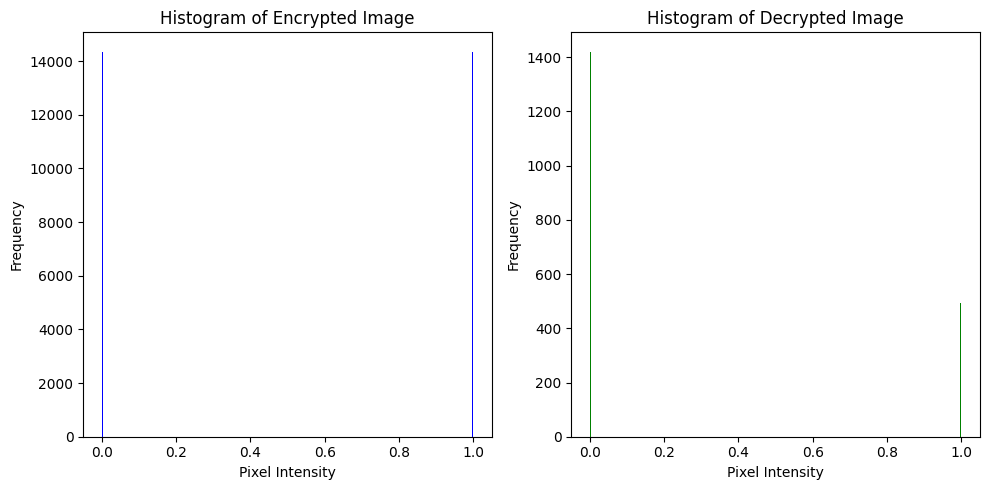

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color

if __name__ == '__main__':



    # Plot histograms
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.hist(encrypted_image.flatten(), bins=256, range=(0, 1), color='blue', alpha=1)
    plt.title('Histogram of Encrypted Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(decrypted_image.flatten(), bins=256, range=(0, 1), color='green', alpha=1)
    plt.title('Histogram of Decrypted Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
from scipy.stats import pearsonr

def correlation(image1, image2):
    # Flatten the images
    flattened_image1 = image1.flatten()
    flattened_image2 = image2.flatten()

    # Calculate Pearson correlation coefficient
    corr_coef, _ = pearsonr(flattened_image1, flattened_image2)

    return corr_coef

# Example usage
if __name__ == '__main__':


    # Calculate correlation coefficient
    corr = correlation(encrypted_image, decrypted_image)
    print("Correlation coefficient:", corr)

Correlation coefficient: 0.00019450966563165664
